In [1]:
from DataIngestor import DataIngestor
from SharpeSurfaceGenerator import SharpeSurfaceGenerator
from ETFRanker import ETFRanker

from datetime import datetime
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# logReturns = 1 means log returns will be used in the calculation of portfolio returns, 0 means pct_changes
# Aperiods = lookback, determines what counts as the short term period, 20 days is the Default setting
# the selection of the ETF is based on maximum weighted score of:

# A returns, or returns in the short term period

# B returns, or returns in the longer term period (here set to 3 times the short term period)

# volatility, or volatility in the short term period.

# Frequency= holding period, how long to wait to rebalance, 18W-FRI is the Default setting for SPY-TLT combination.
# The frequency of a given ETF list can be determined by generating a Sharpe surface, assuming Fridays is the best trading day.

# Frequency="B" every business day, "D" every calendar day; "10B" means every 10 business days ("2B" is the minimum)
# Frequency="W" every weeek, "2W" for every 2 weeks, "3W" every 3 weeks etc
# Frequency="W-TUE" every Tuesday, "2W-TUE" for every 2 Tuesdays, "3W-TUE" every 3 Tuesdays etc
# Frequency= "BM" every month, "2BM" for every 2 months, "3BM" every 3 months etc; B relates to business days; 31 or previous business day if necessary
# Frequency="SM" on the middle (15) and end (31) of the month, or previous business day if necessary

# Delay = 1 if the trade occurs instantaneously with the signal, 2 if the trade occurs 1 day after the signal

# ShortTermWeight = the weight of short term returns, .3 by default
# LongTermWeight = the weight of long term returns, .4 by default
# ShortTermVolatilityWeight = the weight of short term volatility, .4
# ShortTermWeight+LongTermWeight+ShortTermVolatilityWeight should add up to 1.

# other parameters (experimental)
# Cash Filter = 0 (or 1) forces the portfolio to invest in whatever ETF in the list "StandsForCash"
# MAperiods = moving average, usually 200, that prices have to be above of to allow trading, if the cash filter is set to 1.
# StandsForCash = "TLT" #what the system invests in when the CashFilter is triggered, the rightmost ETF in the dataframe
# if you set cash filter to 1, you need to identify what ETF StandsForCash (should be the rightmost ETF in the dataframe)
# Zboundary = -1.5 #alternative cash filter (but need understand and to uncomment line: alternative cash filter)
# Zperiods = 200  #alternative cash filter  (but need understand and to uncomment line: alternative cash filter)
# momentum = 1 means A and B returns are ranked in increasing order (momentum), 0 in decreasing order (reversion to the mean)
# volmomentum = 1 volatility ranked in increasing order (momentum), 0 in decreasing order (reversion to the mean)


In [25]:
##############
# PARAMETERS #
##############

# momentum --> experimental mean reversion trading
# CashFilter, MAperiods, StandsForCash --> for the experimental cash filter
# Aperiods = lookback, determines what counts as the short term period, 20 days is the Default setting
# frequency = holding

param_dict = {"logReturns": 0,
"Aperiods": 6 * 5, 
"Frequency": "14W-FRI",
"momentum" : 1,
"CashFilter" : 0,
"MAperiods" : 200,
"Delay" : 1,
"ShortTermWeight" : 0.3,
"LongTermWeight" : 0.4,
"ShortTermVolatilityWeight" : 0.4,
"StandsForCash" : "SHY",
"max_holding" : 20,
"step_holding" : 1,
"max_lookback" : 12,
"step_lookback" : 5,
"Zboundary": -1.5,
"Zperiods": 200,}



start_year = 2018
start_date= datetime(start_year, 1, 1)
#end_date= datetime(2022, 12, 31)
end_date= datetime.now()
canada_etfs = ["FDN.TO",
"FBT.TO",
"ZEO.TO",
"SKYY.TO",
"XHC.TO",
"FHH.TO",
"CIF.TO",
"FHG.TO",
"FHQ.TO",
"NXTG.TO",
"ZBK.TO",
"RUBY.TO",
"FLI.TO",
"XST.TO",
"COMM.TO",
"CHPS.TO",
"TGRE.TO",
"XGB.TO"]

# canada_etfs = ["FDN.TO",
# "FBT.TO",
# "ZEO.TO",
# "SKYY.TO",
# "XHC.TO",
# "FHH.TO",
# "ZGEN.TO",
# "EARK.NE",
# "CIF.TO",
# "FHG.TO",
# "TRVL.TO",
# "FHQ.TO",
# "NXTG.TO",
# "ZBK.TO",
# "RUBY.TO",
# "FLI.TO",
# "XST.TO",
# "COMM.TO",
# "CHPS.TO",
# "TGRE.TO",
# "XGB.TO"]


canada_bonds = [
    "VSC.TO",
    "VSB.TO",
    "ZIC.TO",
    "HBB.TO",
    "TDB.TO",
    "XBB.TO",
    "XGB.TO"]

stock_list = canada_etfs

In [13]:
# ingest data from yahoo finance
data_ingestor = DataIngestor(stock_list, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
Index(['FDN.TO'], dtype='object')
[*********************100%***********************]  1 of 1 completed
Index(['FBT.TO'], dtype='object')
[*********************100%***********************]  1 of 1 completed
Index(['ZEO.TO'], dtype='object')
[*********************100%***********************]  1 of 1 completed
Index(['SKYY.TO'], dtype='object')
[*********************100%***********************]  1 of 1 completed
Index(['XHC.TO'], dtype='object')
[*********************100%***********************]  1 of 1 completed
Index(['FHH.TO'], dtype='object')
[*********************100%***********************]  1 of 1 completed
Index(['CIF.TO'], dtype='object')
[*********************100%***********************]  1 of 1 completed
Index(['FHG.TO'], dtype='object')
[*********************100%***********************]  1 of 1 completed
Index(['TRVL.TO'], dtype='object')
[*********************100%***********************]  1 of 1 completed
In

In [14]:
# set dataframes from ingested data
close_df, adj_close_df = data_ingestor.close_df_adj_close_df()

In [33]:
adj_close_df.tail(1000)

,FDN.TO,FBT.TO,ZEO.TO,SKYY.TO,XHC.TO,FHH.TO,CIF.TO,FHG.TO,TRVL.TO,FHQ.TO,NXTG.TO,ZBK.TO,RUBY.TO,FLI.TO,XST.TO,COMM.TO,CHPS.TO,TGRE.TO,XGB.TO
Date,,,,,,,,,,,,,,,,,,,
2020-01-27,23.753925,22.136232,35.589966,25.179882,53.385544,30.104393,27.126089,31.182802,NaN,46.776535,9.16,25.292418,17.794298,7.820235,64.775124,22.828072,NaN,NaN,20.536173
2020-01-28,23.753925,22.136232,35.768299,25.179882,53.788715,30.104393,27.236433,31.182802,NaN,47.484970,9.16,25.538944,18.165577,7.882965,64.147377,23.081610,NaN,NaN,20.463474
2020-01-29,23.753925,21.352240,35.683380,25.179882,53.837879,30.104393,27.282410,31.182802,NaN,47.484970,9.16,25.383726,18.029739,7.910846,64.098328,23.297588,NaN,NaN,20.527084
2020-01-30,23.753925,21.352240,35.615440,25.179882,53.444550,30.104393,27.144480,31.182802,NaN,47.179951,9.16,25.502428,18.138409,7.924784,64.088516,22.771729,NaN,NaN,20.527084
2020-01-31,23.753925,21.352240,34.970051,25.179882,52.392376,30.104393,26.896206,31.182802,NaN,47.032360,9.16,25.137194,17.839573,7.764476,63.755039,22.630875,NaN,NaN,20.581608
2020-02-03,23.753925,21.352240,34.978539,25.179882,52.864380,30.104393,27.218048,31.182802,NaN,47.347218,9.16,25.529819,18.147461,7.862054,64.117943,22.903193,NaN,NaN,20.617952
2020-02-04,23.753925,21.490591,34.970051,25.179882,53.759216,30.104393,27.273212,31.182802,NaN,47.347218,9.16,25.931578,18.256138,7.966606,64.431816,23.213078,NaN,NaN,20.536173
2020-02-05,23.753925,21.490591,35.861713,25.179882,54.772057,30.104393,27.521488,31.182802,NaN,48.262283,9.16,26.515947,18.871918,8.126914,64.441635,23.269424,NaN,NaN,20.445307
2020-02-06,23.753925,21.490591,35.776787,25.179882,54.968723,30.104393,27.365166,31.182802,NaN,48.262283,9.16,26.324202,18.745136,8.140851,65.334198,23.419666,NaN,NaN,20.508905


In [26]:
# Generate sharpe surface to find optimal lookback and holding period. 
# use the max_lookback and max_holding paramters to adjust the limits of the graph
sharpe_gen = SharpeSurfaceGenerator(close_df, adj_close_df, param_dict)

In [27]:
sharpe_gen.generate_sharpe_matrix()

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0
average return nan
[nan nan]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jovyan/Rotational_Momentum_Trading_Program/WhiteRealityCheckFor1.py:35: RuntimeWarning: Mean of empty slice.
  mb = xb.mean(axis=0) #arithmetic mean
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [31]:
sharpe_gen.sharpe_matrix

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -2.90620357, -2.404242  , -2.404242  ,
        -2.404242  , -2.404242  , -2.404242  , -2.404242  , -2.404242  ,
        -2.404242  , -2.404242  , -2.404242  , -2.404242  , -2.404242  ,
        -2.404242  , -2.404242  , -2.404242  , -2.404242  , -2.404242  ],
       [ 0.        ,  0.        , -2.404242  , -2.404242  , -2.404242  ,
        -2.404242  , -2.404242  , -2.404242  , -

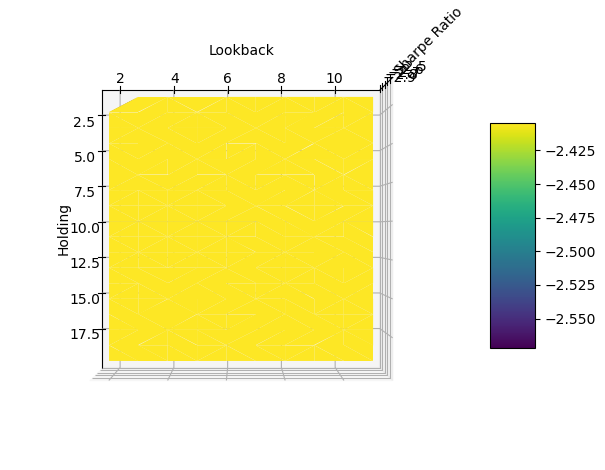

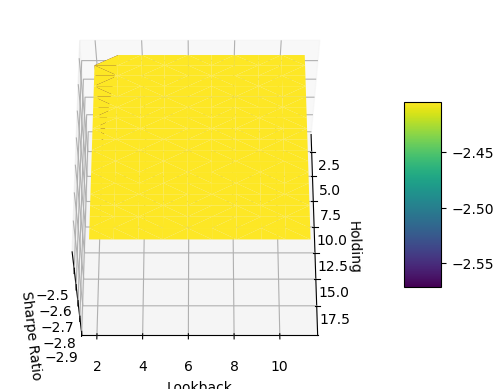

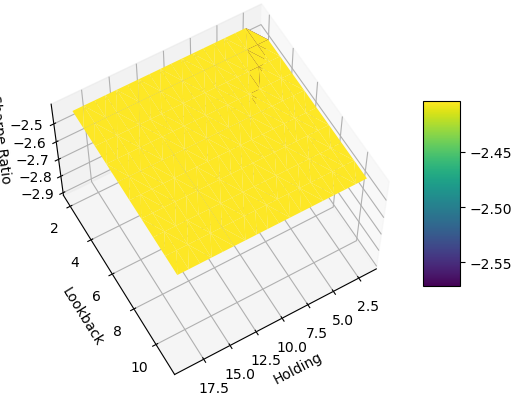

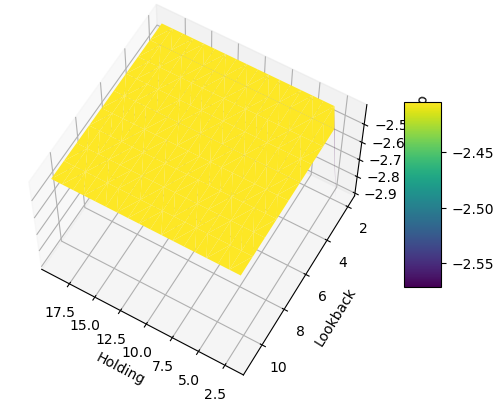

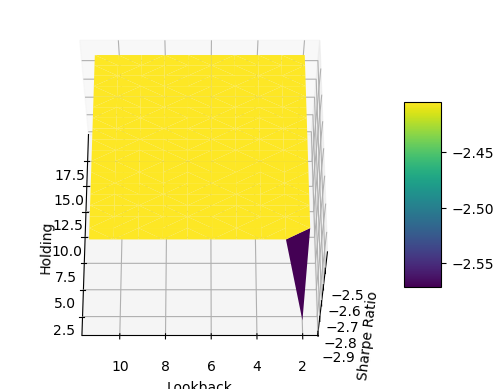

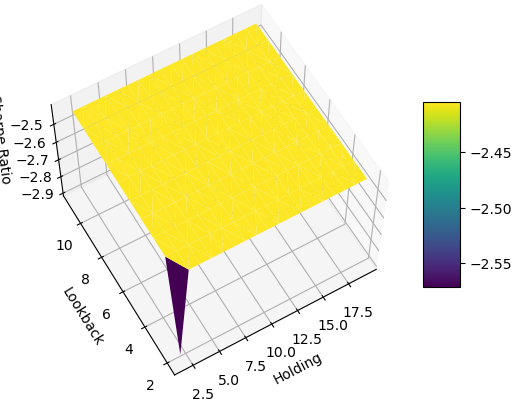

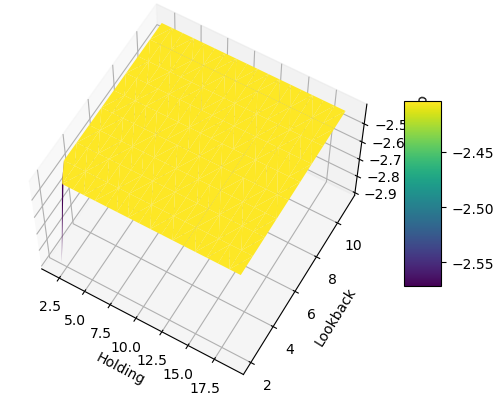

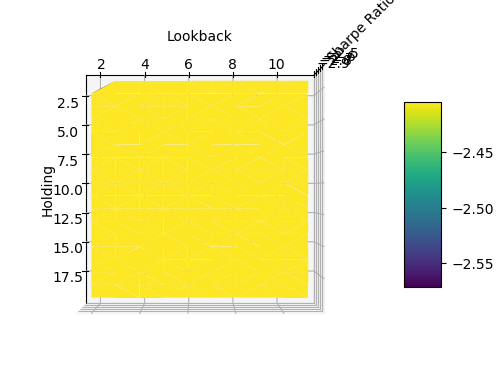

In [28]:
#plot Sharpe surface
sharpe_gen.plot_sharpe_surface()

In [30]:
# look at the numbers for the more precise choice
sharpe_gen.sharpe_surface_df

,lookback,holding,sharpe
1,2.0,2.0,-2.906204
2,3.0,2.0,-2.404242
3,4.0,2.0,-2.404242
4,5.0,2.0,-2.404242
5,6.0,2.0,-2.404242
6,7.0,2.0,-2.404242
7,8.0,2.0,-2.404242
8,9.0,2.0,-2.404242
9,10.0,2.0,-2.404242
10,11.0,2.0,-2.404242


In [ ]:
# rank ETFs to make a choice for today/end_date
ranker = ETFRanker(close_df, adj_close_df, param_dict)

In [ ]:
# choose highest rank
ranker.rank_etfs()

In [ ]:
# The Rotational_Momentum_Simulator will show the returns over a given trading period.

# Group #1
# July 28, 2023 - ETF lookback: 6, holding 14
# November 3, 2023 - ETF lookback 5, holding 11 - Choice ZEO
#                  - Bonds lookback 4, holding 19 - Choice XBB 




# Group #2
# # November 17, 2023 - ETF lookback 9, holding 18 - Choice CHPS 5900
#                  - Bonds lookback 8, holding 19 - Choice ZIC 2400